# **Introducción**


En este cuaderno vamos a explicar como funcionan las regresiones lineales, la bondad de ajuste, y las extrapolaciones. 

El documento se divide en una primera parte teórica y una segunda parte de aplicación práctica de los conceptos estadísticos descritos a nuestro caso particular.

Para ello, utilizaremos los microdatos del INE del censo de vivienda de 1991, 2001 y 2011 de Madrid y de Soria para visualizar la evolución de la vivienda vacía en España a lo largo de 20 años, y también qué podemos esperar para el censo de 2021, que aún no ha sido publicado.

Los microdatos son públicos y pueden descargarse de la página oficial del INE en el siguiente link: https://www.ine.es/dyngs/INEbase/es/operacion.htm?c=Estadistica_C&cid=1254736176992&menu=resultados&idp=1254735576757#!tabs-1254736195714 .

De esta dirección es de donde hemos recopilado los 6 bloques de datos: viviendas de Madrid y de Soria en los 3 años que hemos mencionado antes, así como ficheros excel con la información necesaria para interpretar estos.

# **Definiciones**


## Regresión lineal
La regresión lineal es un método estadístico que trata de modelar la relación entre una variable, ya sea discreta o continua y una o más variables independientes mediante el ajuste de una ecuación lineal. Se llama regresión lineal simple cuando solo hay una variable independiente y regresión lineal múltiple cuando hay más de una. Dependiendo del contexto, a la variable modelada se le conoce como variable dependiente o variable respuesta, y a las variables independientes como regresores, predictores o *features* en inglés.

A lo largo de este documento, se describen los fundamentos teóricos de la regresión lineal, los principales aspectos prácticos a tener en cuenta y nuestro ejemplo de cómo crear este tipo de modelos en Python.

El modelo de regresión lineal, considera que, dado un conjunto de observaciones $\{y_i, x_{i1},...,x_{np}\}^{n}_{i=1}$
, la media  $\mu$  de la variable respuesta $y$ se relaciona de forma lineal con la o las variables regresoras  $x_1  ...  x_p$  acorde a la ecuación:

$$\mu_y = \beta_0 + \beta_1 x_{1} + \beta_2 x_{2} + ... + \beta_p x_{p}$$
 
El resultado de esta ecuación se conoce como la línea de regresión poblacional, y recoge la relación entre los predictores y la media de la variable respuesta.

Otra definición que se encuentra con frecuencia en los libros de estadística es:

$$y_i= \beta_0 + \beta_1 x_{i1} + \beta_2 x_{i2} + ... + \beta_p x_{ip} +\epsilon_i$$
 
En este caso, se está haciendo referencia al valor de  $y$  para una observación  $i$  concreta. El valor de una observación puntual nunca va a ser exactamente igual al promedio, de ahí que se añada el término de error  $\epsilon$ .

En ambos casos, la interpretación de los elementos del modelo es la misma:

$\beta_0$ : es la ordenada en el origen, se corresponde con el valor promedio de la variable respuesta  y  cuando todos los predictores son cero.

$\beta_j$ : es el efecto promedio que tiene sobre la variable respuesta el incremento en una unidad de la variable predictora  $x_j$ , manteniéndose constantes el resto de variables. Se conocen como coeficientes parciales de regresión.

$e$ : es el residuo o error, la diferencia entre el valor observado y el estimado por el modelo. Recoge el efecto de todas aquellas variables que influyen en  y  pero que no se incluyen en el modelo como predictores.

En la gran mayoría de casos, los valores  $β_0$  y  $β_j$  poblacionales se desconocen, por lo que, a partir de una muestra, se obtienen sus estimaciones  $\hat{\beta}_0$  y  $\hat{\beta}_j$ . Ajustar el modelo consiste en estimar, a partir de los datos disponibles, los valores de los coeficientes de regresión que maximizan la verosimilitud (likelihood), es decir, los que dan lugar al modelo que con mayor probabilidad puede haber generado los datos observados.

El método empleado con más frecuencia es el ajuste por mínimos cuadrados ordinarios (OLS), que identifica como mejor modelo la recta (o plano si es regresión múltiple) que minimiza la suma de las desviaciones verticales entre cada dato de entrenamiento y la recta, elevadas al cuadrado.

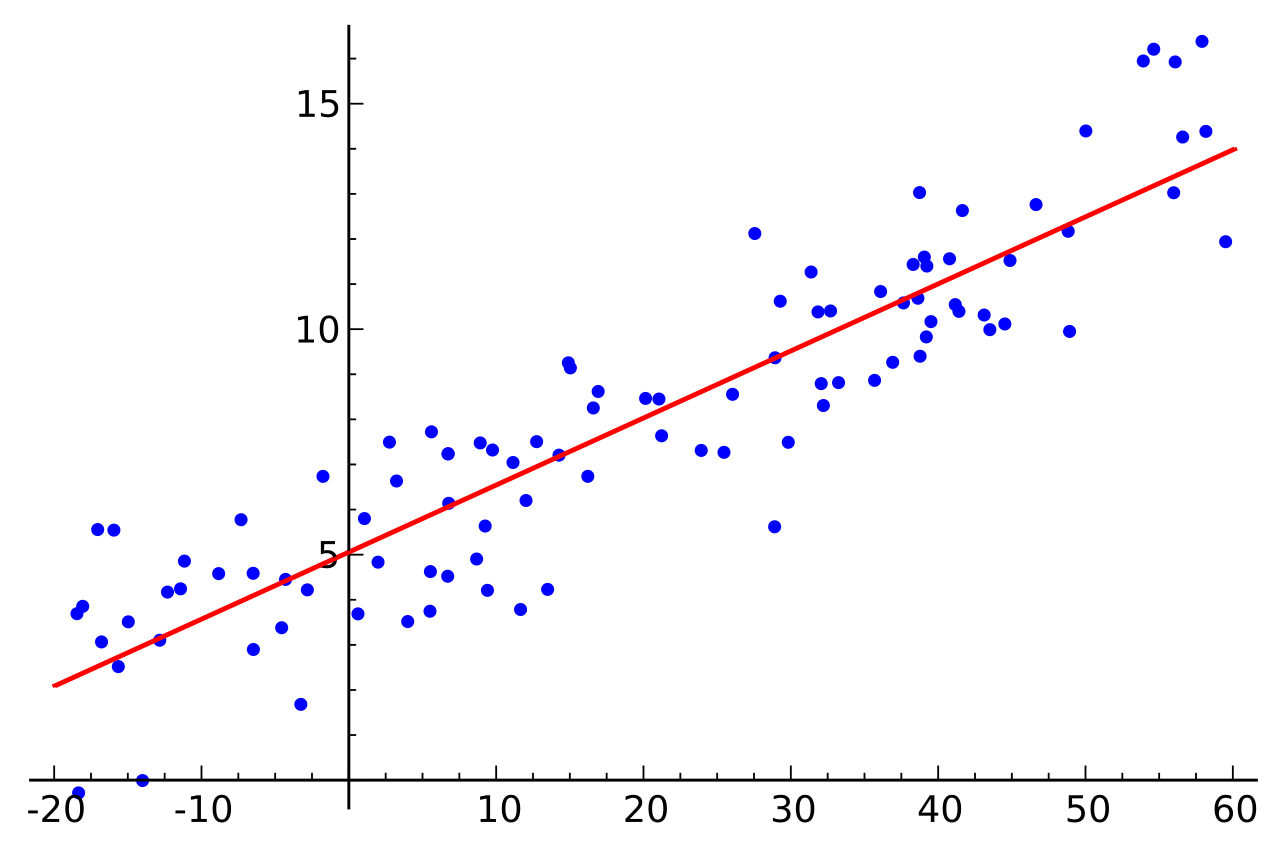

Ejemplo de una regresión lineal con una variable dependiente y una variable independiente

Una vez estimados los coeficientes, se pueden obtener las estimaciones de cada observación 
$$\hat{y}_i : \hat{y}_i= \hat{\beta}_0 + \hat{\beta}_1 x_{i1} + \hat{\beta}_2 x_{i2} + ... + \hat{\beta}_p x_{ip}$$ 

Finalmente, la estimación de la varianza del modelo \hat{\sigma}^2 se obtiene como:

$$\hat{\sigma}^2 = \frac{\sum^n_{i=1} \hat{\epsilon}_i^2}{n-p} = \frac{\sum^n_{i=1} (y_i - \hat{y}_i)^2}{n-p}$$
donde  n  es el número de observaciones y  p  el número de predictores.

## Bondad de ajuste

La bondad de ajuste del modelo hace referencia a la utilidad de nuestro modelo lineal a la hora de predecir resultados, pues aún siendo la recta que mejor se ajusta a nuestro modelo, puede tener un gran margen de error.

Las métricas más utilizadas para medir la calidad del ajuste son: el error estándar de los residuos y el coeficiente de determinación R^2.

## Error estándar de los residuos (RSE)

Mide la desviación promedio de cualquier punto estimado por el modelo respecto de la recta de regresión. Tiene las mismas unidades que la variable respuesta. Una forma de saber si el valor del RSE es elevado consiste en dividirlo entre el valor medio de la variable respuesta, obteniendo así un % de la desviación:

$$RSE = \sqrt{\frac{1}{n-p-1}RSS}$$

En modelos lineales simples, dado que hay un único predictor  (n−p−1)=(n−2) .


## Coeficiente de determinación R^2

describe la proporción de varianza de la variable respuesta explicada por el modelo y relativa a la varianza total. Su valor está acotado entre 0 y 1. Al ser adimensional, presenta la ventaja frente al RSE de ser más fácil de interpretar.

$$R^2 = 1-\frac{\sum(\hat{y_i}-y_i)^2}{\sum(y_i-\overline{y})^2}$$

En los modelos de regresión lineal simple el valor de  $R^2$  se corresponde con el cuadrado del coeficiente de correlación de Pearson (r) entre  $x$  e  $y$ , no siendo así en regresión múltiple.

En los modelos lineales múltiples, cuantos más predictores se incluyan en el modelo, mayor es el valor de  R2 . Esto es así ya que, por poco que sea, cada predictor va a explicar una parte de la variabilidad observada en  y . Es por esto que  R2  no puede utilizarse para comparar modelos con distinto número de predictores.

$R^2_{ajustado}$  introduce una penalización al valor de  $R^2$  por cada predictor que se añade al modelo. El valor de la penalización depende del número de predictores utilizados y del tamaño de la muestra, es decir, del número de grados de libertad. Cuanto mayor es el tamaño de la muestra, más predictores se pueden incorporar en el modelo. 

$R^2_{ajustado}$  permite encontrar el mejor modelo, aquel que consigue explicar mejor la variabilidad de  y  con el menor número de predictores.

$$R^2_{ajustado} = R^{2} - (1-R^{2})\frac{n-1}{n-p-1}$$

# Librerías

In [71]:
#Para el manejo de dataframes:
import pandas as pd

#Para trabajar con arrays y para realizar operaciones matemáticas y estadísticas básicas:
import numpy as np 

#para generar datos aleatorios
import random

#Para realizar los gráficos:
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

#Para la operación regresion lineal
from sklearn.linear_model import LinearRegression
from sklearn import linear_model

#Para las operaciones estadísticas:
import scipy.stats

In [72]:
#actualizar algún paquete que le falta al entorno
#pip install openpyxl==3.0.9

# Datos


Importamos los datos de una hoja de excel. Inicialmente estaban en un archivo .txt, pero es más fácil identificar las variables si inicialmente los pasamos a excel y lo procesamos ligeramente, dividiendo las variables en columnas y los datos en filas.


In [73]:
#Cargar el dataset

#from google.colab import files
#uploaded = files.upload()

so91 = 'Soria vivienda 91.xlsx'

datos = pd.read_excel(so91, sheet_name='Soria91', header = 0, usecols = ['SUP','HAB'])

#print (datos.head(10))
##quitar las almohadillas una vez haya subido los archivos a google colab



print (datos.head(10))

   SUP  HAB
0   75    4
1  135    6
2   95    6
3  110    6
4   85    4
5   85    5
6  110    6
7  110    6
8   95    4
9   95    4




Vamos ahora con unos graficos que relacionen ciertas características de los datos, de modo que podamos intuir si existe una correlación alta o baja. Despues aplicaremos la estadística para obtener resultados fiables.
En principio vamos a relacionar variables que sean numéricas, porque las regresiones lineales solo tienen sentido entre variables cuantitativas.


# La Regresión lineal puesta en practica

Tras haber procesado los microdatos en excel, tenemos los siguientes datos respecto a la vivienda vacía en madrid y en soria:

Año, Porcentaje de vivienda vacia

Madrid (en rojo):

1991, 12'79%

2001, 7'87%

2011, 5'45%

Soria (en azul):

1991, 18'34%

2001, 17'03%

2011, 14'84%

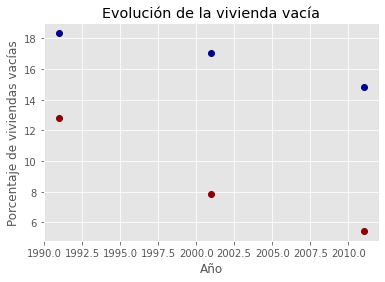

In [74]:
#datos de la evolución de la vivienda vacia en madrid y soria, correspondientes a los archivos madridcsv.csv y soriacsv.csv

x = [1991,2001,2011]
y_1 = [1279/100,787/100,545/100]
y_2 = [1834/100,1703/100,1484/100]
plt.plot(x,y_1,'o',color='darkred')

plt.plot(x,y_2,'o',color='darkblue')

plt.xlabel('Año')

plt.ylabel('Porcentaje de viviendas vacías')

plt.title('Evolución de la vivienda vacía')

plt.show()

# Recta de Regresión

En una primera instancia, vamos a calcular la recta de regresión que mejor se ajusta a una nube de puntos mediante programas predefinidos que actuen como una "caja negra", es decir, metemos los datos por un lado, salen por otro transformados y no sabemos lo que ocurre dentro del programa.

Usaremos en este apartado la biblioteca sklearn y su funcion linear model.

In [75]:
# Nuestra recta de regresión la calcularemos como y = mx + n donde, por definición, m = beta_1 y n = beta_0

#quitar las almohadillas de las dos siguientes lineas una vez subido a GitHub
#from google.colab import files
#uploaded = files.upload()

processMad = pd.read_csv('madridcsv.csv',sep=';')
print (processMad.head())
processSo = pd.read_csv('soriacsv.csv',sep=';')
print (processSo.head())

   anos  ratio
0  1991   1279
1  2001    787
2  2011    545
   anos  ratio
0  1991   1834
1  2001   1703
2  2011   1484


In [76]:
ejex = processMad['anos'].values.reshape(-1,1)
ejey1 = processMad['ratio'].values.reshape(-1,1)
ejey2 = processSo['ratio'].values.reshape(-1,1)
linear_regressor_mad = LinearRegression()
linear_regressor_so = LinearRegression()
mad_linear = linear_regressor_mad.fit(ejex, ejey1)
mad_pred = linear_regressor_mad.predict(ejex)
so_linear = linear_regressor_so.fit(ejex, ejey2)
so_pred = linear_regressor_so.predict(ejex)
print(mad_pred)
print(so_pred)

[[1237.33333333]
 [ 870.33333333]
 [ 503.33333333]]
[[1848.66666667]
 [1673.66666667]
 [1498.66666667]]


In [77]:
#y = m*x + n
#recta madrid
m_1 = linear_regressor_mad.coef_[0][0]
n_1 = linear_regressor_mad.intercept_[0]

label_mad = r'$ratio = %0.4f*Años %+0.4f$'%(m_1,n_1)
print(label_mad)

$ratio = -36.7000*Años +74307.0333$


In [78]:
#y = m*x + n
#recta soria
m_2 = linear_regressor_so.coef_[0][0]
n_2 = linear_regressor_so.intercept_[0]

label_so = r'$ratio = %0.4f*Años %+0.4f$'%(m_2,n_2)
print(label_so)

$ratio = -17.5000*Años +36691.1667$


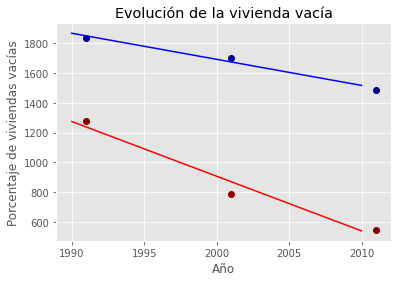

In [79]:
x = [1991,2001,2011]
y_1 = [1279,787,545]
y_2 = [1834,1703,1484]
plt.plot(x,y_1,'o',color='darkred')

plt.plot(x,y_2,'o',color='darkblue')

plt.xlabel('Año')

plt.ylabel('Porcentaje de viviendas vacías')

plt.title('Evolución de la vivienda vacía')

x_range = range(1990,2011)
def f_1(x_range):
  return (m_1*x_range + n_1)

def f_2(x_range):
  return (m_2*x_range + n_2)
  
plt.plot(x_range, [f_1(i) for i in x_range], color='red')
plt.plot(x_range, [f_2(i) for i in x_range], color='blue')

plt.show()

#El método del descenso del gradiente

¿Qué es el descenso de gradiente? El descenso de gradiente es uno de los métodos más utilizados para hallar los parámetros de modelos de algoritmos de machine learning, es decir, problemas de optimización sin restricciones.

En esta sección vamos a calcular la regresión lineal, pero esta vez desde un punto de vista más matématico, es decir, sabiendo lo que esta ocurriendo y por qué.


#¿Como funciona?

El método del descenso del gradiente es un algoritmo de optimización que permite converger hacia el valor mínimo de una función mediante un proceso iterativo. En machine learning básicamente se utiliza para minimizar una función que mide el error de predicción del modelo en el conjunto de datos.

Para identificar el mínimo de la función el método del descenso del gradiente calcula la derivada parcial respecto a cada parámetro en el punto de evaluación. Este vector de derivadas parciales, en Matemáticas lo llamamos gradiente. Este gradiente indica el valor y sentido en que se encuentra la pendiente más pronunciada, es decir el "camino más rapido" hacia el mínimo (o respectivamente hacia el máximo). Este puede ser tanto un mínimo local como global, el método no los puede diferenciar (en nuestro caso no importará demasiado porque habrá un unico mínimo). El resultado de la derivada se le resta a cada uno de los parámetros multiplicado por la velocidad de aprendizaje (learning rate) $\alpha$. La velocidad de aprendizaje generalmente tiene un valor entre 0 y 1 e indica lo rápido que converge el algoritmo, en métodos numericos a este $\alpha$ se le llama "paso" y nos proporciona, en resumen, la distancia entre una iteración y la siguiente. Valores típicos son 0.1, 0.001, etc. Es importante notar que es necesario seleccionar un valor adecuado. Un valor demasiado bajo puede provocar que nunca se alcance el mínimo, o que el coste de programación sea muy alto. Por otro lado, un valor lo demasiado alto podría saltarse el mínimo. Este valor hay que introducirlo a mano y hacerlo bien depende de las skills de cada uno como programador.

vamos a generar un conjunto de datos ficticios con los que empezar a trabajar:



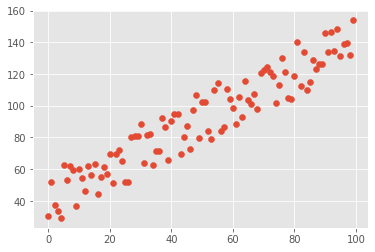

In [80]:
def gen_data(n, bias, varianza):
    x = []
    y = []
    for i in range(0, n):
        x.append(i)
        y.append((i + bias) + random.uniform(0, 1) * varianza)
    return x, y
 
x,y = gen_data(100, 25, 35)
plt.scatter(x, y)

Este código genera una serie de datos que sigue básicamente una recta alrededor de la cual se crean los puntos de forma aleatoria usando una función de distribución uniforme con una varianza dada (35 en este caso pero se puede cambiar de parámetro a gusto del usuario para ver como varía la forma del gráfico).
La idea es, a partir de todos estos datos, crear un modelo que sea capaz de predecir el valor de la $y$ dado un valor nuevo de $x$. En este caso es muy obvio que un buen predictor es una línea recta (por eso lo de lineal) que se ajuste lo más posible a la nube de puntos. Así pues, nuestro problema ahora es encontrar esa recta, la de mejor ajuste.
Puesto que la ecuación de la recta en el plano es $y = a + bx$, o en nuetro caso: $y = \beta_0 + \beta_1 x $  nuestro papel será aproximar lo más eficientemente posible los valores de $\beta_0$ y $\beta_1$ 

Lo primero que necesitamos es una forma de medir lo bien o mal que se ajusta una recta a la nube de puntos.
A cada par de valores que probemos para $\beta_0$ y $\beta_1$ lo vamos a llamar hipótesis, y seguidamente comprobaremos cómo se ajusta esa hipótesis calculando un factor de error, que es la suma de lo que, de media, se equivoca dicha hipótesis (recta) al predecir cada uno de los puntos de la nube. Este error se calcula con la siguiente fórmula:

$$e=\frac{1}{2m}\sum_{i=1}^{m}(h(x_{i})-y_{i})^{2}$$

donde $h(x_i)$ es la hipotesis que queremos probar: en nuestro caso $h(x_i) = \beta_0 + \beta_1 x$. A esta famosa formula que hemos denotado con el nombre de e, se la denomina error cuadrático medio.

Como se puede comprobar, este funciona calculando la diferencia entre nuestra hipótesis y lo que predice nuestra recta.
El resultado de la resta (error) se eleva al cuadrado para evitar que unos errores se compensen con otros, de forma que el error siempre sea positivo. Resumiendo, lo que buscamos son los valores de las betas (nuestra hipótesis) que minimice el error devuelto por esta función. Ahí es donde entra en juego nuestro algoritmo del descenso de gradiente.

La función de error que acabamos de ver es una función convexa (no voy a demostrarlo aquí), lo que es muy interesante, ya que sólo tiene un valor mínimo que es global a toda la función. Lo cual nos evitará caer en errores del tipo: nuestro algoritmo se detiene en un mínimo local, o, la convergencia hacia el mínimo global no está garantizada globalmente, es decir, desde cualquier punto de partida desde el que queramos empezar con nuestras betas, siempre y cuando estén "cerca" del mínimo global.

Se puede imaginar como algo parecido a la siguiente imagen:

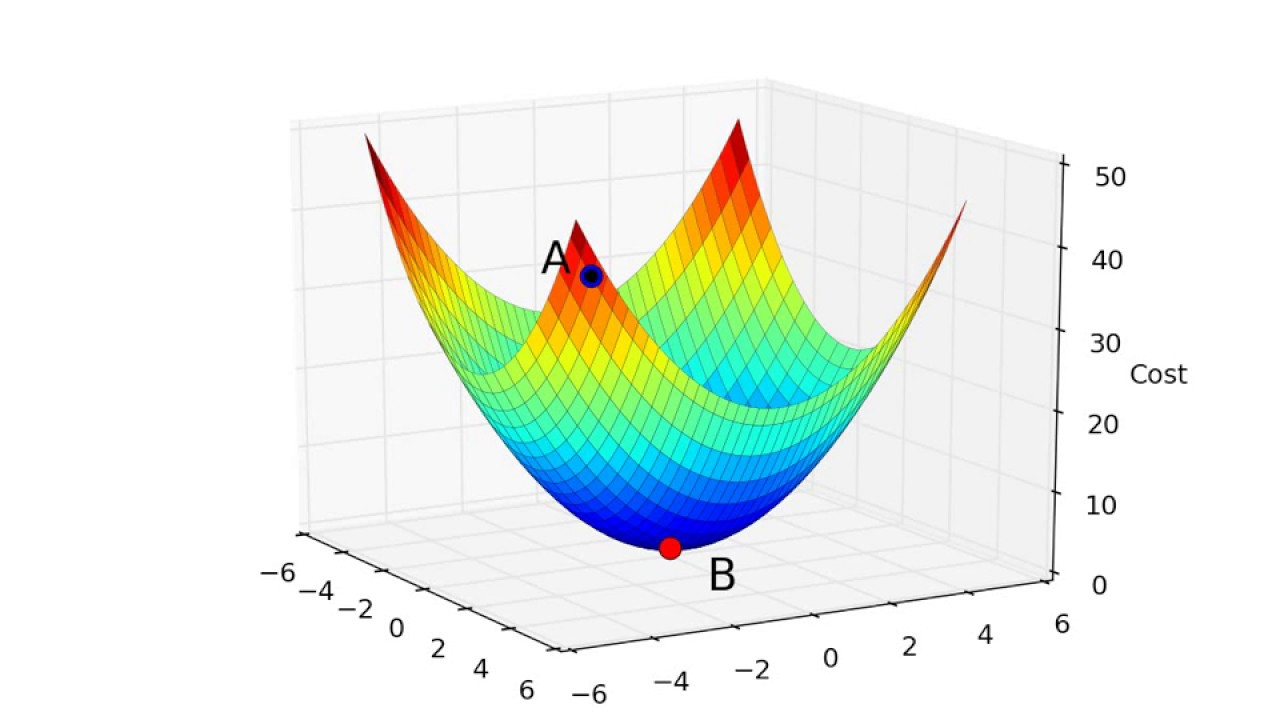

Imaginamos que el punto A es nuestra hipótesis inicial, y como queremos encontrar el valor de a y b que minimicen la función de error, lo que se busca es llegar al punto B. Conceptualmente, la derivada nos indica la velocidad a la que crece o decrece una función en uno de sus puntos. Por lo tanto, lo que debemos hacer es ir moviendo el punto A en la dirección de mayor pendiente (mayor velocidad) para llegar a B. Como hay dos variables en juego, a y b, debemos calcular las derivadas parciales de la función de error con respecto a las dos variables.

$$\beta_0 = \beta_0 -\alpha \frac{\partial }{\partial a}e(\beta_0,\beta_1)$$

$$\beta_1 = \beta_1 -\alpha \frac{\partial }{\partial a}e(\beta_0,\beta_1)$$



Si resolvemos estas ecuaciones diferenciales:

$$\beta_0 = \beta_0 -\alpha \frac{1}{m}\sum_{i=1}^{m}(h(x_{i})-y_{i})$$

$$\beta_1 = \beta_1 -\alpha \frac{1}{m}\sum_{i=1}^{m}(h(x_{i})-y_{i})$$

En teoría, cada vez que recalculamos estas dos ecuaciones, estaremos más y más cerca del mínimo de la función de error, y por lo tanto, nuestra recta se ajustará mejor a la nube de puntos.
Vamos a definir nuestra fución de error:

In [81]:
def coste(x, y, beta_0, beta_1):
    m = len(x)
    error = 0.0
    for i in range(m):
        hipotesis = beta_0+beta_1*x[i]
        error +=  (y[i] - hipotesis) ** 2
    return (error/(2*m))

La función obtiene como parámetros una lista de valores $x$ e $y$, así como los valores $a$ ($\beta_0$) y $b$ ($\beta_1$) para la hipótesis. Estos valores iniciales de $a$ y $b$ se pueden calcular mediante un conjunto de prueba de los datos iniciales.
A partir de ahí simplemente se calcula la ecuación de error que hemos visto más arriba y se devuelve el resultado:

In [82]:
def descenso_gradiente(x, y, beta_0, beta_1, alpha, iterations):
    m = len(x)
    hist_coste = []
    for k in range(iterations):
        beta_1_deriv = 0
        beta_0_deriv = 0
        for i in range(m):
            hipotesis = beta_0+beta_1*x[i]
            beta_0_deriv += hipotesis - y[i]
            beta_1_deriv += (hipotesis - y[i]) * x[i]
        beta_0 -= (beta_0_deriv / m) * alpha
        beta_1 -= (beta_0_deriv / m) * alpha
        hist_coste.append(coste(x, y, beta_0, beta_1))
        
    return beta_0, beta_1 , coste(x, y, beta_0, beta_1)

La función de descenso de gradiente, además de los parámetros de la función de coste, recibe $\alpha$ (learning rate) y el número de iteraciones, o lo que es lo mismo, el número de veces que vamos a recalcular y aplicar la pendiente de a y b para ir acercándonos al mínimo de la función de error.

La función devuelve los valores óptimos de a y b que mejor ajustan la recta a la nube de puntos (o al menos un valor suficientemente cercano), es decir: la recta de regresión de estos datos.

# Aplicación a nuestro caso de uso

Ahora, vamos a implementar la tecnología desarrollada en el apartado anterior, aplicándola a nuestro caso de uso. 
Para ello, convertiremos las columnas de datos del fichero de excel que nos interesan (superficie y número de habitaciones) en arrays de numpy, les daremos el nombre de X e Y, les aplicaremos el descenso de gradiente y comprobaremos si los resultados son razonables.

In [83]:
so91 = 'Soria vivienda 91.xlsx'

df = pd.read_excel(so91, sheet_name='Soria91', header=0, usecols=['SUP','HAB'])

#buscar drop nan, tambien rellenar los nan con los valores de una regresion de prueba

#en el caso de que hubiera valores NaN, los quitamos

so91_limpio = df.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)

#hacer luego so91_imputado (dar a los nan los valores calculados por una regresion de valores de entrenamiento)

np_array = so91_limpio.values
#vamos a llamar metros a los metros cuadrados de los hogares, y hab al número de habitaciones
metros = np_array[:,0]
hab = np_array[:,1]

In [84]:
#comprobamos que ambas columnas tengan la misma cantidad de datos para que no ocurran cosas raras
print (len(metros),len(hab))

5971 5971


#Muestra aleatoria para corregir el modelo

Para que el método de descenso del gradiente funcione de forma óptima, es necesario seleccionar unos valores lo más cercanos posibles a nuestras $\beta_0$ y $\beta_1$ (desconocidas).

Para ello, vamos a hacer una regresión lineal de una muestra de prueba (pongamos, de 20 datos) y con esas betas iniciales comenzaremos el proceso de descenso de gradiente.

In [102]:
datos_random = np.random.shuffle(np_array)

metros_random = np_array[:20,0]
hab_random = np_array[:20,1]
  
# display random rows
print("\nDatos random:")

print(metros_random)
print(hab_random)


Datos random:
[ 65  45  45  65  85  75 110  45 110 135  85 165 165 200  85  75  95  95
  85 110]
[ 5  4  2  4  4  5  6  5  5  5  5 10  5  8  3  4  8  8  4  8]


,superficie,habitaciones
0,65,5
1,45,4
2,45,2
3,65,4
4,85,4
5,75,5
6,110,6
7,45,5
8,110,5
9,135,5


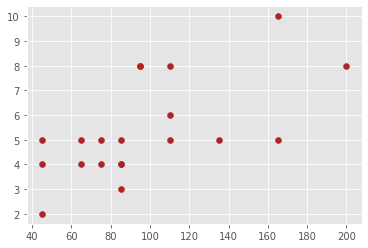

In [114]:
# Datos random
metros_random
hab_random
datos_random = pd.DataFrame({'superficie': metros_random, 'habitaciones': hab_random})

plt.scatter(metros_random, hab_random, color = 'firebrick')

#relación entre superficie y número de habitaciones

datos_random.head(20)

In [104]:
reg_sup = datos_random['superficie'].values.reshape(-1,1)
reg_hab = datos_random['habitaciones'].values.reshape(-1,1)
linear_regressor = LinearRegression()
linear_regressor.fit(reg_sup, reg_hab)
habitaciones_pred = linear_regressor.predict(reg_sup)
habitaciones_pred

array([[4.44630072],
       [3.85023866],
       [3.85023866],
       [4.44630072],
       [5.04236277],
       [4.74433174],
       [5.78744033],
       [3.85023866],
       [5.78744033],
       [6.5325179 ],
       [5.04236277],
       [7.42661098],
       [7.42661098],
       [8.46971957],
       [5.04236277],
       [4.74433174],
       [5.34039379],
       [5.34039379],
       [5.04236277],
       [5.78744033]])

In [105]:
#y = beta_1*x + beta_0
beta_1 = linear_regressor.coef_[0][0]
beta_0 = linear_regressor.intercept_[0]
label = r'$Habitaciones = %0.4f*Superficie %+0.4f$'%(beta_1,beta_0)
print(label)

$Habitaciones = 0.0298*Superficie +2.5091$


In [106]:
coste(metros,hab,beta_0,beta_1)

0.6587434002781671

In [107]:
descenso_gradiente(metros,hab,beta_0,beta_1,0.01,200)

(2.508470418187193, 0.02917447546642755, 0.6531232446434656)

#Resultados

La ecuación de la recta de regresión viene determinada por los parametros calculados, de la siguiente forma $$y = \beta_1 x + \beta_0$$
Por arrojar un poco más de luz, por ejemplo con un paso $\alpha$ = 0.01 y tras 100 iteraciones nos sale un valor de $\beta_0$ de alrededor de 2,7 y $\beta_1$ alrededor de 0,025 y con un error medio (calculado entre todos los puntos) de alrededor de 0,65. 
De los parámetros podemos decir que $\beta_0$ es el que más variación tiene entre simulaciones, y el que proporciona más incertidumbre

En este caso no daremos datos exactos de cuanto valen las betas y la función de error, puesto que lo hemos programado todo para que dependa de 20 datos escogidos al azar de entre los 5971 con los que trabajamos.
Aunque siempre existe cierta incertidumbre, daremos por buena nuestra aproximación y, a continuación pasaremos a pintar la gráfica para comprobar que nuestra recta de regresión es, visualmente, coherente con el resultado esperado.

#Graficando la recta de regresión
Vamos a proceder a pintar la recta de regresión de nuestro conjunto de datos elegidos al azar sobre la grafica anterior, mediante el método pyplot de la librería matplotlib.

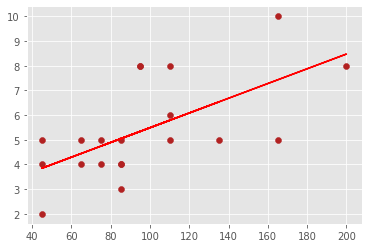

In [108]:
plt.scatter(metros_random, hab_random, color = 'firebrick')
ax.set_title('relación entre superficie y numero de habitaciones');

plt.plot(metros_random, habitaciones_pred, color='red')

#Algunas operaciones estadísticas

Vamos a proceder a calcular la correlación (coeficiente r de pearson) y el p-valor, para sacar alguna conclusión adicional.

In [109]:
# Correlación lineal entre las dos variables

corr_test = scipy.stats.pearsonr(metros, hab)
print("Coeficiente de correlación de Pearson: ", corr_test[0])

Coeficiente de correlación de Pearson:  0.5641195869084684


In [110]:
# Correlación lineal entre las dos variables (construida a partir de los datos aleatorios)

corr_test = scipy.stats.pearsonr(metros_random, hab_random)
print("Coeficiente de correlación de Pearson: ", corr_test[0])
print("P-valor: ", corr_test[1])

Coeficiente de correlación de Pearson:  0.6226340585513601
P-valor:  0.003367116079792712


#Interpretación del P-valor

El valor p es un valor de probabilidad, por lo que oscila entre 0 y 1. El valor p nos muestra la probabilidad de haber obtenido el resultado que hemos obtenido suponiendo que la hipótesis nula $H_0$ es cierta. Se suele decir que valores altos de p no permiten rechazar la $H_0$, mientras que valores bajos de p sí permiten rechazar la $H_0$

En una prueba estadística, se rechaza la hipótesis nula H0 si el valor p asociado al resultado observado es igual o menor que un nivel de significación $\alpha$ establecido arbitrariamente, convencionalmente 0,05 o 0,01. En otras palabras, si el resultado obtenido es más inusual que el rango esperado de resultados dada una hipótesis nula $H_0$ cierta y el nivel de significación $\alpha$  elegido, es decir si p es menor que $\alpha$, podemos decir que tenemos un resultado estadísticamente significativo que permite rechazar $H_0$.

En nuestro y dependiendo de la muestra que saquemos (se generan aleatoriamente mediante una funcion de numpy) un valor p de entre 0.05 y 0.01 no arroja evidencias abrumadoras, pero si suficientes como para decir (en nuestro caso, el ejemplo que hemos puesto) que la superficie de una vivienda esta correlacionada con el numero de habitaciones de la misma.
Pasaría un test estadístico con una confianza el 95%, que son los típicos, pero no pasaría uno del 99%, mientras que un valor p por debajo de 0.01 arrojaría fuertes evidencias estadísticas.